라이브러리 임포트

In [14]:
import numpy as np
import pandas as pd
import os
# import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
# from tqdm import tqdm
# from keras.callbacks import EarlyStopping,ModelCheckpoint
# from sklearn.metrics import confusion_matrix , accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import RandomFlip, RandomRotation
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터셋 읽어오기

# 훈련셋 불러오기
image_data = 'Data/Train_Test_Valid/Train'
pd.DataFrame(os.listdir(image_data), columns=['Files_Name'])

,Files_Name
0,barrel_jellyfish
1,blue_jellyfish
2,compass_jellyfish
3,lions_mane_jellyfish
4,mauve_stinger_jellyfish
5,Moon_jellyfish


In [7]:
# 검증셋 불러오기
image_valid_data = 'Data/Train_Test_Valid/Valid'
pd.DataFrame(os.listdir(image_valid_data), columns=['Files_Name'])

,Files_Name
0,barrel_jellyfish
1,blue_jellyfish
2,compass_jellyfish
3,lions_mane_jellyfish
4,mauve_stinger_jellyfish
5,Moon_jellyfish


In [8]:
# 데이터프레임을 생성하는 함수 정의
def create_dataframe(image_folder):
    files = glob.glob(os.path.join(image_folder, '**', '*.*'), recursive=True)  # 모든 파일을 재귀적으로 검색
    np.random.shuffle(files)  # 파일을 섞음
    labels = [os.path.basename(os.path.dirname(f)) for f in files]  # 폴더 이름에서 라벨 추출
    return pd.DataFrame({'Image': files, 'Label': labels})

# 훈련 및 검증 데이터프레임 생성
dataframe_train = create_dataframe(image_data)
dataframe_valid = create_dataframe(image_valid_data)

# 데이터프레임의 첫 몇 행을 표시
dataframe_train.head(), dataframe_valid.head()

(                                               Image              Label
 0  Data/Train_Test_Valid/Train\blue_jellyfish\68.png     blue_jellyfish
 1  Data/Train_Test_Valid/Train\compass_jellyfish\...  compass_jellyfish
 2  Data/Train_Test_Valid/Train\Moon_jellyfish\57.jpg     Moon_jellyfish
 3  Data/Train_Test_Valid/Train\compass_jellyfish\...  compass_jellyfish
 4  Data/Train_Test_Valid/Train\compass_jellyfish\...  compass_jellyfish,
                                                Image                    Label
 0  Data/Train_Test_Valid/Valid\blue_jellyfish\48.jpg           blue_jellyfish
 1  Data/Train_Test_Valid/Valid\Moon_jellyfish\60.jpg           Moon_jellyfish
 2  Data/Train_Test_Valid/Valid\mauve_stinger_jell...  mauve_stinger_jellyfish
 3  Data/Train_Test_Valid/Valid\mauve_stinger_jell...  mauve_stinger_jellyfish
 4  Data/Train_Test_Valid/Valid\lions_mane_jellyfi...     lions_mane_jellyfish)

시각화

Dataset                   Training  Validation
Label                                         
Moon_jellyfish           16.666667   15.384615
barrel_jellyfish         16.666667   12.820513
blue_jellyfish           16.666667   17.948718
compass_jellyfish        16.666667   17.948718
lions_mane_jellyfish     16.666667   17.948718
mauve_stinger_jellyfish  16.666667   17.948718


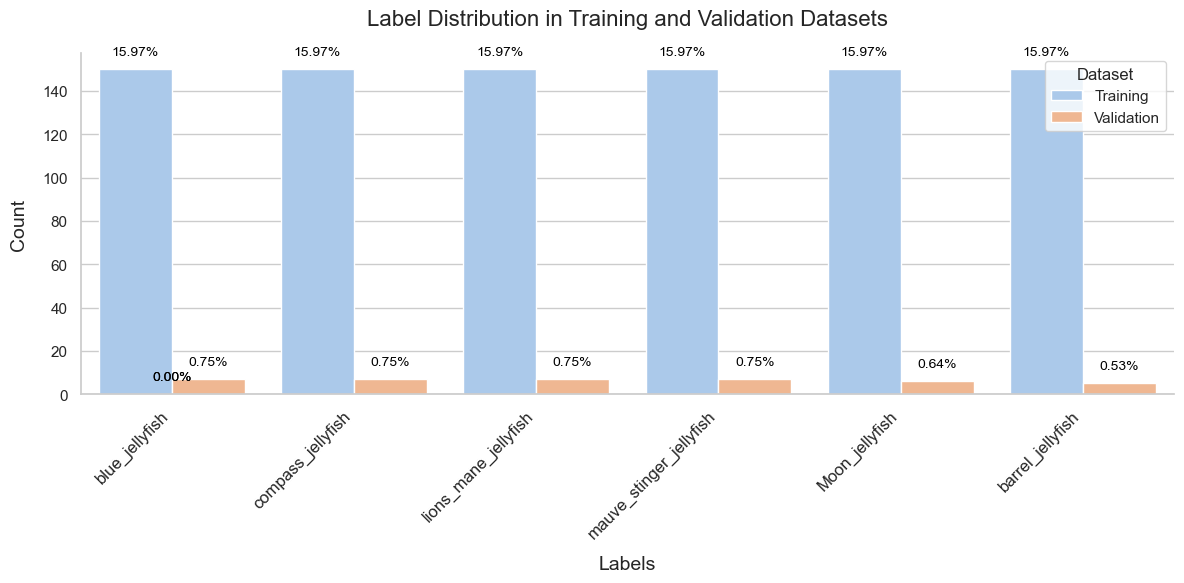

In [13]:
# 훈련 및 검증 데이터프레임에 데이터셋 구분 열 추가
dataframe_train['Dataset'] = 'Training'
dataframe_valid['Dataset'] = 'Validation'

# 두 데이터프레임을 결합
combined_df = pd.concat([dataframe_train, dataframe_valid], ignore_index=True)

# 더 나은 미관을 위해 테마 설정
sns.set_theme(style="whitegrid")

# 각 데이터셋의 라벨별 개수 및 비율 계산
count_data = combined_df.groupby(['Label', 'Dataset']).size().unstack(fill_value=0)
percentage_data = count_data.div(count_data.sum(axis=0), axis=1) * 100

# 비율 데이터 출력 (선택 사항)
print(percentage_data)

# 막대의 색상 팔레트 생성
palette = sns.color_palette("pastel", len(count_data))

# 훈련 및 검증 데이터셋의 라벨 분포를 나타내는 막대 그래프 생성
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_df, x="Label", hue="Dataset", order=count_data.sum(axis=1).sort_values(ascending=False).index, palette="pastel")

# 각 막대에 비율 값 주석 추가
for p in ax.patches:
    height = p.get_height()  # 막대의 높이 가져오기
    percentage = f'{(height / len(combined_df)) * 100:.2f}%'  # 비율 계산
    ax.annotate(percentage,  # 주석으로 추가할 라벨
                (p.get_x() + p.get_width() / 2., height),  # 라벨의 위치
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 8), textcoords='offset points')

# x축 라벨을 더 잘 보이도록 회전하고 폰트 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)

# 제목과 라벨 추가 (폰트 및 패딩 개선)
plt.title("Label Distribution in Training and Validation Datasets", fontsize=16, pad=20)
plt.xlabel("Labels", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# 상단과 오른쪽 테두리를 제거하여 깔끔한 모양으로 만듦
sns.despine()

# 그래프를 표시
plt.tight_layout()  # 겹침을 방지하기 위해 레이아웃 조정
plt.show()

전처리

전체 데이터 개수: 979
훈련 세트 개수: 685 (69.97%)
검증 세트 개수: 196 (20.02%)
테스트 세트 개수: 98 (10.01%)


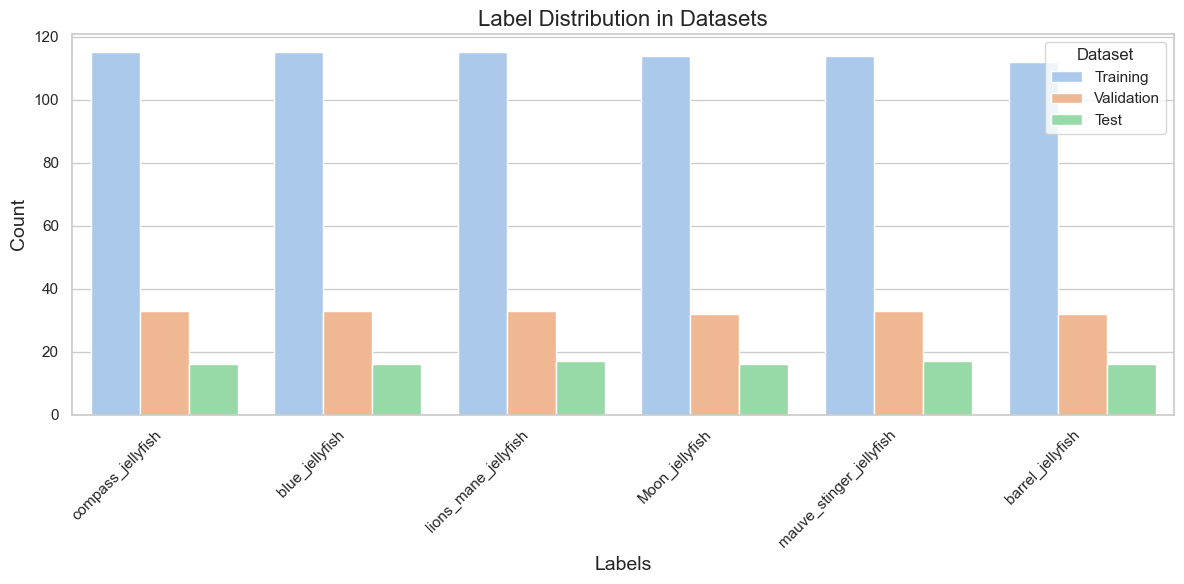

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0499364].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.096616..1.0333796].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1323701].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0185728].


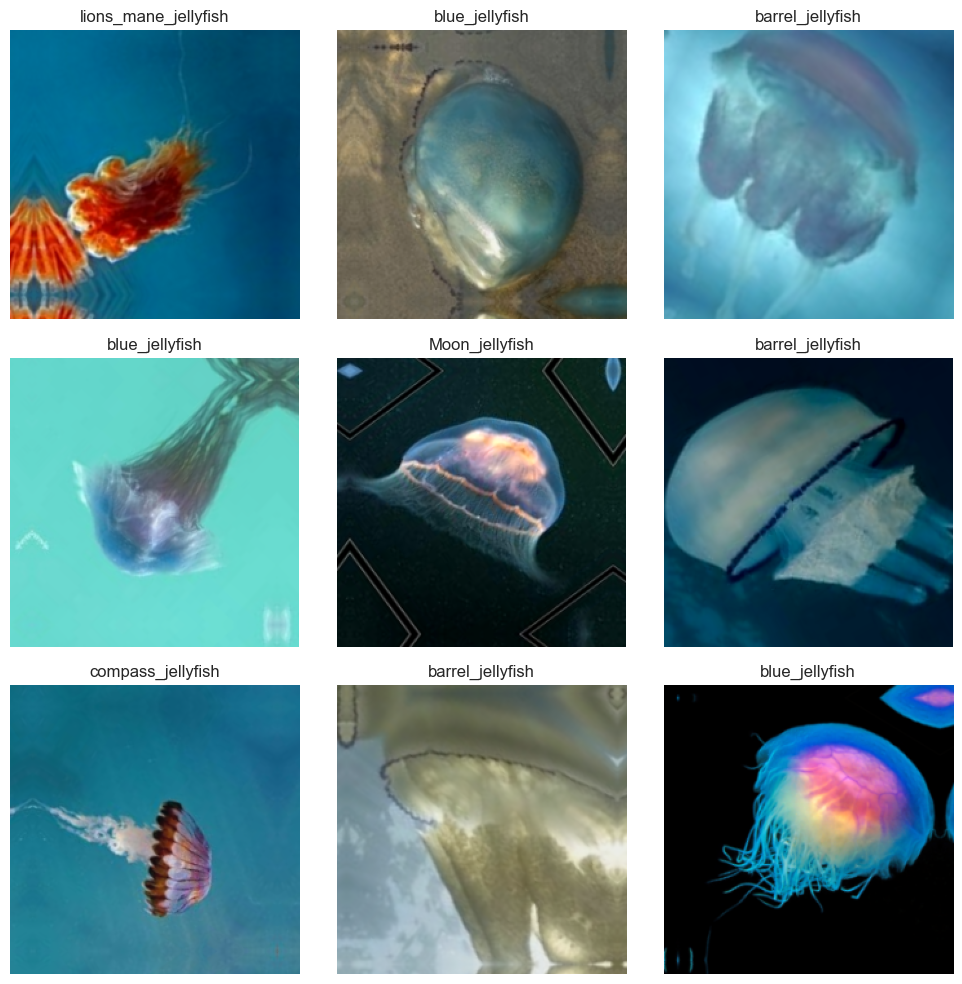

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 디렉토리 설정
train_dir = 'Data/Train_Test_Valid/Train'
valid_dir = 'Data/Train_Test_Valid/Valid'
test_dir = 'Data/Train_Test_Valid/Test'

# 모든 데이터를 합치기
def get_file_paths_and_labels(directory):
    file_paths = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    file_paths.append(os.path.join(class_dir, fname))
                    labels.append(class_name)
    return file_paths, labels

# 각 폴더에서 이미지와 라벨 불러오기
train_file_paths, train_labels = get_file_paths_and_labels(train_dir)
valid_file_paths, valid_labels = get_file_paths_and_labels(valid_dir)
test_file_paths, test_labels = get_file_paths_and_labels(test_dir)

# 모든 데이터를 합치기
all_file_paths = train_file_paths + valid_file_paths + test_file_paths
all_labels = train_labels + valid_labels + test_labels

# 데이터프레임 생성
data_df = pd.DataFrame({'file_path': all_file_paths, 'label': all_labels})

# 라벨 인코딩
class_names = sorted(data_df['label'].unique())
num_classes = len(class_names)
label_to_index = dict((name, index) for index, name in enumerate(class_names))
data_df['label_index'] = data_df['label'].map(label_to_index)

# 데이터를 원하는 비율로 훈련, 검증, 테스트 세트로 분할
train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
    data_df['file_path'], data_df['label_index'],
    test_size=0.1,  # 전체 데이터의 10%를 테스트 세트로 사용
    stratify=data_df['label_index'],
    random_state=123
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_val_paths, train_val_labels,
    test_size=0.2222,  # 남은 데이터의 22.22%를 검증 세트로 사용하여 전체의 20%가 되도록 설정
    stratify=train_val_labels,
    random_state=123
)

# 분할된 데이터의 비율 확인
total_count = len(data_df)
train_count = len(train_paths)
val_count = len(val_paths)
test_count = len(test_paths)

print(f"전체 데이터 개수: {total_count}")
print(f"훈련 세트 개수: {train_count} ({train_count/total_count*100:.2f}%)")
print(f"검증 세트 개수: {val_count} ({val_count/total_count*100:.2f}%)")
print(f"테스트 세트 개수: {test_count} ({test_count/total_count*100:.2f}%)")

# 라벨별 개수 시각화
def plot_label_distribution(labels, dataset_name):
    label_counts = pd.Series(labels).value_counts()
    label_counts.index = [class_names[i] for i in label_counts.index]
    df = pd.DataFrame({'Label': label_counts.index, 'Count': label_counts.values})
    df['Dataset'] = dataset_name
    return df

train_df = plot_label_distribution(train_labels, 'Training')
val_df = plot_label_distribution(val_labels, 'Validation')
test_df = plot_label_distribution(test_labels, 'Test')

combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=combined_df, x='Label', y='Count', hue='Dataset', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Label Distribution in Datasets', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# 이미지 전처리 함수 정의
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # 정규화
    return image, label

# 데이터 증강 레이어 정의
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

# 훈련 데이터셋 생성
train_ds = tf.data.Dataset.from_tensor_slices((list(train_paths), list(train_labels)))
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                        num_parallel_calls=tf.data.AUTOTUNE)

# 검증 데이터셋 생성
val_ds = tf.data.Dataset.from_tensor_slices((list(val_paths), list(val_labels)))
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# 테스트 데이터셋 생성
test_ds = tf.data.Dataset.from_tensor_slices((list(test_paths), list(test_labels)))
test_ds = test_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# 배치 및 프리페치 설정
batch_size = 16

train_ds = train_ds.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# 데이터 증강 결과 시각화
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image = images[i].numpy()
        label = class_names[labels[i]]
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image)
        plt.title(label)
        plt.axis("off")
plt.tight_layout()
plt.show()


여기서 부터 모델 구축, 및 학습.